# Likelihood contourf with heavy nonminimal model

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd

from exp_analysis_class import full_likelihood
from dark_nus_utils import load_datasets
from const import alphaQED

In [3]:
hierarchy = 'light'
D_or_M = 'majorana'

save_folder = f'../fig/6_limit_visualisation/{hierarchy}_{D_or_M}/'
!mkdir -p $save_folder

In [4]:
# my_exp_analyses = load_datasets(hierarchy, D_or_M, 
#                                 fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [5]:
my_exp_analyses = load_datasets(hierarchy, D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

light majorana FHC
Wall time: 4.389106035232544 s, CPU time: 0.430989007
light majorana RHC
Wall time: 4.377983808517456 s, CPU time: 0.4179035050000004


In [9]:
this_analysis = my_exp_analyses['light_majorana_FHC']

In [ ]:
this_analysis.df_base

Text(0, 0.5, '$\\epsilon$')

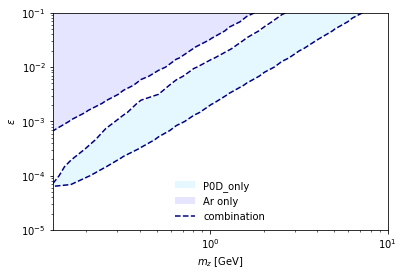

In [36]:
colors = ['deepskyblue', 'blue', 'navy']
contours = {}
# contours['P0D_only'] = plt.contour(mz_ticks, epsilon_ticks, out['tpc_pod_only'][0].T, 
#                                   levels=[levels[0.9]], colors=[colors[0]])
contours['P0D_only'] = plt.contourf(mz_ticks, epsilon_ticks, out['tpc_pod_only'][0].T, 
                                  levels=[-np.inf, levels[0.9]], colors=[colors[0]], alpha=0.1)
# contours['Ar only'] = plt.contour(mz_ticks, epsilon_ticks, out['tpc_argon_only'][0].T, 
#                                   levels=[levels[0.9]], colors=[colors[1]])
contours['Ar only'] = plt.contourf(mz_ticks, epsilon_ticks, out['tpc_argon_only'][0].T, 
                                  levels=[-np.inf, levels[0.9]], colors=[colors[1]], alpha=0.1)
contours['combination'] = plt.contour(mz_ticks, epsilon_ticks, out['tpc'][0].T, 
                                  levels=[levels[0.9]], colors=[colors[2]])
# contours['combination'] = plt.contourf(mz_ticks, epsilon_ticks, out['tpc'][0].T, 
#                                   levels=[-np.inf, levels[0.9]], colors=[colors[2]], alpha=0.1)
leg2 = plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
           contours.keys(),
           frameon=False,
           loc='lower center')


# plt.gca().add_artist(leg1)
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

# plt.savefig(save_folder + 'dark_photon_bounds_comparison_expo_integral.png', bbox_inches='tight', dpi=250)
# plt.savefig(save_folder + 'dark_photon_bounds_comparison_expo_integral.pdf')

# Evaluting ratio of events between Ar and Lead

In [7]:
from Likelihood import LEff_v
from ctau_utils import ctau_heavy
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import physics_parameters
from matplotlib.colors import LogNorm

In [20]:
material_Z = {
    'hydrogen': 1,
    'carbon': 6,
    'argon': 18,
}

Z_s = list(material_Z.values())
events_without_selection = []
for material, Z in material_Z.items():
    events_without_selection.append(this_analysis.compute_expectation(this_analysis.df_base,
                                  ntarget_per_material={material:1}, 
                                  pot=1,
                                  selection_query=material,
                                  **physics_parameters['light']['bp'])[1].sum())
    
Z_s = np.asarray(Z_s)
events_without_selection = np.asarray(events_without_selection)
events_with_selection = np.asarray(events_with_selection)

Text(0.5, 0, 'Z')

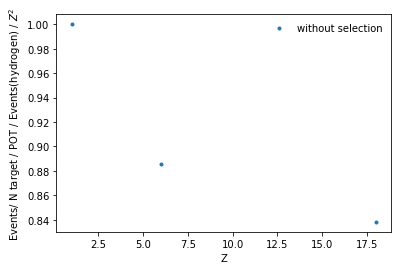

In [21]:
plt.plot(Z_s, events_without_selection/events_without_selection[0]/Z_s**2, '.', label='without selection')
plt.legend(frameon=False)
plt.ylabel(r'Events/ N target / POT / Events(hydrogen) / $Z^2$')
plt.xlabel('Z')

In [29]:
out = {}
for analysis_label in ['nueccqe_fgd']:
    aux = full_likelihood(exp_analyses_objects=my_exp_analyses,
                 hierarchy=hierarchy,
                 D_or_M=D_or_M,
                 analyses=[analyses[analysis_label]],
               **physics_parameters['light']['bp']) 
    out[analysis_label] = [np.squeeze(a) for a in aux]

FHC
RHC


In [9]:
mz_ticks = np.geomspace(my_exp_analyses[f'{hierarchy}_{D_or_M}_FHC'].mz_limits[0], 0.09, 5)
epsilon_ticks = np.geomspace(1e-5, 1e-1, 6)

In [36]:
out = this_analysis.compute_expectation(this_analysis.df_base,
                          m4=physics_parameters['light']['bp']['m4'],
                          mz=mz_ticks,
                          alpha_dark=physics_parameters['light']['bp']['alpha_dark'],
                          epsilon=epsilon_ticks,
                          Umu4_2=physics_parameters['light']['bp']['Umu4_2'],
                          Ud4_2=None,
                          ntarget_per_material=analyses['nueccqe_fgd']['FHC']['n_target'], 
                          pot=analyses['nueccqe_fgd']['FHC']['pot'],
                          selection_query=analyses['nueccqe_fgd']['FHC']['selection'],
                          efficiency_factor=analyses['nueccqe_fgd']['FHC']['efficiency'],
                          )

In [39]:
out = this_analysis.compute_likelihood(this_analysis.df_base,
                          m4=physics_parameters['light']['bp']['m4'],
                          mz=mz_ticks,
                          alpha_dark=physics_parameters['light']['bp']['alpha_dark'],
                          epsilon=epsilon_ticks,
                          Umu4_2=physics_parameters['light']['bp']['Umu4_2'],
                          Ud4_2=None,
                          analysis=analyses['nueccqe_fgd']['FHC'],
                          )

ValueError: operands could not be broadcast together with shapes (20,) (20,5,6) 

In [ ]:
out[0].shape

In [ ]:
### Old trials

In [11]:
aux_df, all_weights = out[0], out[1]

In [12]:
all_weights = np.squeeze(all_weights)

In [15]:
xs = aux_df[analyses['nueccqe_fgd']['FHC']['var']].values

In [16]:
new_xs = np.repeat(xs, np.prod(all_weights.shape[1:]), axis=-1).reshape(all_weights.shape)

In [31]:
n_entries = len(xs)

In [28]:
aux2 = np.vstack((new_xs, all_weights))

In [32]:
def hist1d(a):
    return np.histogram(a[:n_entries], bins=analyses['nueccqe_fgd']['FHC']['binning'], weights=a[n_entries:])[0]

In [33]:
mu_hist = np.apply_along_axis(func1d=hist1d, axis=0, arr=aux2)

(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)
(5613862,)


In [35]:
mu_hist.shape

(20, 5, 6)

# $m_z - \epsilon$ plot

In [35]:
mz_ticks = np.geomspace(my_exp_analyses[f'{hierarchy}_{D_or_M}_FHC'].mz_limits[0], 0.09, 5)
epsilon_ticks = np.geomspace(1e-5, 1e-1, 6)

In [38]:
out = {}
for analysis_label in ['nueccqe_fgd', 'tpc_light']:
    aux = full_likelihood(exp_analyses_objects=my_exp_analyses,
                          hierarchy=hierarchy,
                          D_or_M=D_or_M,
                          analyses=[analyses[analysis_label]],
                          m4=physics_parameters['heavy']['bp']['m4'],
                          mz=mz_ticks,
                          alpha_dark=physics_parameters['heavy']['bp']['alpha_dark'],
                          epsilon=epsilon_ticks,
                          Umu4_2=physics_parameters['heavy']['bp']['Umu4_2'],
                          Ud4_2=1) 
    break
    out[analysis_label] = [np.squeeze(a) for a in aux]

FHC


IndexError: tuple index out of range

See if I can replicate the likelihood of the combination easily

In [18]:
out['tpc_pod_only']

3

In [20]:
out['tpc_argon_only']

[array([[-4.78724330e-05, -1.84065021e-04, -6.32317695e-04,
         -1.99255546e-03, -6.06148526e-03, -1.70968877e-02,
         -4.30886013e-02, -1.00632793e-01, -2.24860067e-01,
         -4.92435258e-01, -1.09188621e+00, -2.34403860e+00,
         -4.88597732e+00, -9.83831340e+00, -1.87344942e+01,
         -3.30522109e+01, -5.34301726e+01, -7.92666180e+01,
         -1.09100866e+02, -1.41390837e+02, -1.75011406e+02,
         -2.09300388e+02, -2.43911808e+02, -2.78675657e+02,
         -3.13510868e+02],
        [-7.05192472e-06, -3.02153873e-05, -1.20260128e-04,
         -4.28933324e-04, -1.37182051e-03, -4.18768811e-03,
         -1.24719875e-02, -3.37457251e-02, -8.21954977e-02,
         -1.88165304e-01, -4.18025975e-01, -9.35370218e-01,
         -2.01984138e+00, -4.23171595e+00, -8.59353069e+00,
         -1.65916939e+01, -2.98021756e+01, -4.90967325e+01,
         -7.40927043e+01, -1.03401482e+02, -1.35423915e+02,
         -1.68940872e+02, -2.03215369e+02, -2.37856938e+02,
         -2.7

In [21]:
out['tpc']

[array([[-1.01146427e-01, -3.03079247e-01, -7.23294277e-01,
         -1.36193300e+00, -2.11278210e+00, -2.35066104e+00,
         -1.99400528e+00, -1.54716712e+00, -9.67395632e-01,
         -6.67159718e-01, -1.10325349e+00, -2.34412215e+00,
         -4.88597734e+00, -9.83831340e+00, -1.87344942e+01,
         -3.30522109e+01, -5.34301726e+01, -7.92666180e+01,
         -1.09100866e+02, -1.41390837e+02, -1.75011406e+02,
         -2.09300388e+02, -2.43911808e+02, -2.78675657e+02,
         -3.13510868e+02],
        [-1.89027244e-02, -7.36808454e-02, -2.45114357e-01,
         -6.44549228e-01, -1.34844848e+00, -2.29383433e+00,
         -2.96058139e+00, -2.75019516e+00, -2.05292607e+00,
         -1.20269354e+00, -6.86805280e-01, -9.54847159e-01,
         -2.02018568e+00, -4.23171809e+00, -8.59353069e+00,
         -1.65916939e+01, -2.98021756e+01, -4.90967325e+01,
         -7.40927043e+01, -1.03401482e+02, -1.35423915e+02,
         -1.68940872e+02, -2.03215369e+02, -2.37856938e+02,
         -2.7

In [31]:
np.max(out['tpc_pod_only'][0] + out['tpc_argon_only'][0] - out['tpc'][0]), np.min(out['tpc_pod_only'][0] + out['tpc_argon_only'][0] - out['tpc'][0])

(0.02104121267249892, -0.08879832353497208)

In [32]:
np.max(out['tpc_pod_only'][1] + out['tpc_argon_only'][1] - out['tpc'][1]), np.min(out['tpc_pod_only'][1] + out['tpc_argon_only'][1] - out['tpc'][1])

(1.7763568394002505e-14, -2.930988785010413e-14)

In [37]:
np.max(out['tpc_pod_only'][2] + out['tpc_argon_only'][2] - out['tpc'][2]), np.min(out['tpc_pod_only'][2] + out['tpc_argon_only'][2] - out['tpc'][2])

(1.6653345369377348e-16, -1.249000902703301e-16)

In [10]:
from ctau_utils import ctau_heavy
def heavy_nonminimal_posterior(my_exp_analyses, fluxes=['FHC', 'RHC'], 
                               hierarchy='heavy', D_or_M='majorana',
                               m4=0.12, mz=1.25, Umu4_2=2.2e-7, Ud4_2=1, alpha_d=0.4, epsilon=2.1e-2,
                               systs=tpc_systematic_uncertainties, 
                               additional_efficiency=0.1,
                               selection_query='cut_based & (~argon)',
                               ctau_mode='expo'):
    Vmu4_alpha_epsilon2 = alpha_d * Umu4_2 * alphaQED * epsilon**2
    Valpha4_alpha_epsilon2 = alpha_d * Ud4_2 * alphaQED * epsilon**2
    ctau = ctau_heavy(m4, 
                      mz, 
                      Valpha4_alpha_epsilon2, 
                      D_or_M)
    
    leff, mu, sigma2, N_ctau, N_final = 0, 0, 0, 0, 0
    for flux in fluxes:
        my_exp_analysis = my_exp_analyses[f'{hierarchy}_{D_or_M}_{flux}']
        this_mu = Vmu4_alpha_epsilon2/my_exp_analysis.Vmu4_alpha_epsilon2 * additional_efficiency
        syst = systs[flux]
        aux_mu, aux_sigma2, aux_N_ctau, aux_N_final = my_exp_analysis.kde_n_events(df=my_exp_analysis.df_base,
                                                                                   selection_query=selection_query,
                                                                                     m4mz=(m4, mz),
                                                                                     ctau=ctau,
                                                                                     mu=this_mu,
                                                                                     distance=distance,
                                                                                     smoothing=smoothing_pars,
                                                                                     provide_n_samples=True,
                                                                                     ctau_mode=ctau_mode)
        leff += LEff(0, aux_mu, aux_sigma2 + (syst*aux_mu)**2)
        mu += aux_mu
        sigma2 += (aux_sigma2 + (syst*aux_mu)**2) 
        N_ctau += aux_N_ctau
        N_final += aux_N_final
    return leff, mu, sigma2, ctau, N_ctau, N_final

heavy_nonminimal_posterior_v = np.vectorize(heavy_nonminimal_posterior, excluded=['my_exp_analyses', 'fluxes', 'hierarchy', 'D_or_M',
                                                                                  'method', 'systs', 'additional_efficiency', 
                                                                                  'ctau_mode', 'selection_query'])

In [41]:
np.max(out['tpc_pod_only'][0] + out['tpc_argon_only'][0] - aux), np.min(out['tpc_pod_only'][0] + out['tpc_argon_only'][0] - aux)

(0.02213445730879038, -128.53809727118139)

In [27]:
physics_parameters['heavy']['bp']

{'m4': 0.12,
 'mz': 1.25,
 'alpha_dark': 0.4,
 'epsilon': 0.021447610589527218,
 'Umu4_2': 2.2e-07,
 'Ud4_2': 0.1}

In [55]:
my_exp_analyses['heavy_majorana_FHC'].compute_likelihood(my_exp_analyses['heavy_majorana_FHC'].df_base,
                                       m4=0.12,
                                      mz=physics_parameters['heavy']['bp']['mz'],
                                      alpha_d=physics_parameters['heavy']['bp']['alpha_dark'],
                                      # epsilon=physics_parameters['heavy']['bp']['epsilon'],
                                      epsilon=0.021,
                                      Umu4_2=physics_parameters['heavy']['bp']['Umu4_2'],
                                      Ud4_2=1,
                                      analysis=analyses['tpc']['FHC'])                                

(array([[[[[[-0.15059513]]]]]]),
 array([[[[[[0.15059513]]]]]]),
 array([[[[[[0.00608048]]]]]]),
 array([[[[[[1177]]]]]]),
 array([[[[[[0.11340116]]]]]]))

In [56]:
my_exp_analyses['heavy_majorana_RHC'].compute_likelihood(my_exp_analyses['heavy_majorana_RHC'].df_base,
                                       m4=0.12,
                                      mz=physics_parameters['heavy']['bp']['mz'],
                                      alpha_d=physics_parameters['heavy']['bp']['alpha_dark'],
                                      # epsilon=physics_parameters['heavy']['bp']['epsilon'],
                                      epsilon=0.021,
                                      Umu4_2=physics_parameters['heavy']['bp']['Umu4_2'],
                                      Ud4_2=1,
                                      analysis=analyses['tpc']['RHC'])                                

(array([[[[[[-0.01438864]]]]]]),
 array([[[[[[0.01438864]]]]]]),
 array([[[[[[5.11068578e-05]]]]]]),
 array([[[[[[1164]]]]]]),
 array([[[[[[0.11340116]]]]]]))

In [68]:
physics_parameters['heavy']['bp']

{'m4': 0.12,
 'mz': 1.25,
 'alpha_dark': 0.4,
 'epsilon': 0.021447610589527218,
 'Umu4_2': 2.2e-07,
 'Ud4_2': 0.1}

In [47]:
out = {}
for analysis_label in ['tpc_pod_only', 'tpc_argon_only']:
    out[analysis_label] = full_likelihood(m4=0.1,
                         mz=mz_ticks,
                         alpha_d=physics_parameters['heavy']['bp']['alpha_dark'],
                         epsilon=epsilon_ticks,
                         Umu4_2=physics_parameters['heavy']['bp']['Umu4_2'],
                         Ud4_2=1,
                         exp_analyses_objects=my_exp_analyses,
                         hierarchy=hierarchy,
                         D_or_M=D_or_M,
                         analyses=[analyses[analysis_label]])                                

FHC
RHC
FHC
RHC


In [48]:
aux = my_exp_analyses['heavy_majorana_FHC'].compute_likelihood(my_exp_analyses['heavy_majorana_FHC'].df_base,
                                                          m4=0.1,
                                                         mz=mz_ticks,
                                                         alpha_d=physics_parameters['heavy']['bp']['alpha_dark'],
                                                         epsilon=epsilon_ticks,
                                                         Umu4_2=physics_parameters['heavy']['bp']['Umu4_2'],
                                                         Ud4_2=1,
                                                          analysis=analyses['tpc']['FHC'])                                

<ipython-input-57-9f7cc07a80fc>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mz_ticks, epsilon_ticks, np.squeeze(out['tpc_pod_only'][0] + out['tpc_argon_only'][0]).T)


Text(0.5, 1.0, 'FHC + RHC')

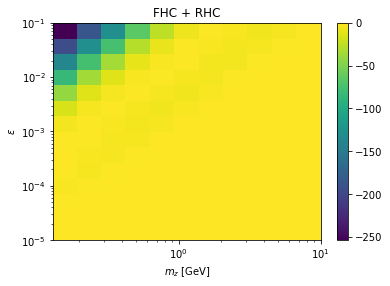

In [57]:
# plt.pcolormesh(mz_ticks, epsilon_ticks, np.squeeze(out['tpc_pod_only'][1] + out['tpc_argon_only'][1]).T, norm=LogNorm())
plt.pcolormesh(mz_ticks, epsilon_ticks, np.squeeze(out['tpc_pod_only'][0] + out['tpc_argon_only'][0]).T)
plt.colorbar()
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')
plt.title('FHC + RHC')

In [50]:
# like_fhc = np.squeeze(out[0])
like_full = np.squeeze(out2[0])

# mu_fhc = np.squeeze(out[1])
mu_full = np.squeeze(out2[1])

In [12]:
# calculation
dark_photons_constraints_expo = {}
dark_photons_constraints_integral = {}
dark_photons_constraints_integral_last_layer_lead = {}
for Ud4_2 in dark_photons_Ud4_2_s:
    # dark_photons_constraints_expo[Ud4_2] = heavy_nonminimal_posterior_v(my_exp_analyses, 
    #                                                                mz=mz, epsilon=epsilon, Ud4_2=Ud4_2, 
    #                                                                ctau_mode='expo')    
    dark_photons_constraints_integral[Ud4_2] = heavy_nonminimal_posterior_v(my_exp_analyses, 
                                                                   mz=mz, epsilon=epsilon, Ud4_2=Ud4_2, 
                                                                   ctau_mode='integral')
    # dark_photons_constraints_integral_last_layer_lead[Ud4_2] = heavy_nonminimal_posterior_v(my_exp_analyses, 
    #                                                                mz=mz, epsilon=epsilon, Ud4_2=Ud4_2, 
    #                                                                ctau_mode='integral_last_layer_lead')

In [13]:
%time dark_photons_constraints_integral[0.1] = heavy_nonminimal_posterior_v(my_exp_analyses,mz=mz, epsilon=epsilon, Ud4_2=0.1, ctau_mode='integral')

CPU times: user 5.21 s, sys: 0 ns, total: 5.21 s
Wall time: 5.2 s


<ipython-input-16-09c5e74b1bc6>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mz, epsilon, dark_photons_constraints_integral[1][1])


Text(0.5, 1.0, 'FHC + RHC - old method')

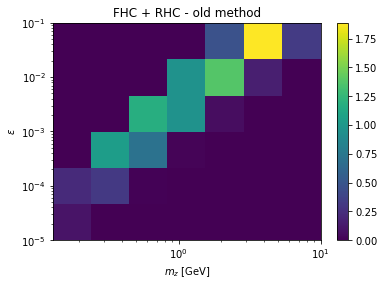

In [16]:
plt.pcolormesh(mz, epsilon, dark_photons_constraints_integral[1][1])
plt.colorbar()
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')
plt.title('FHC + RHC - old method')

<ipython-input-17-a680133f1ff6>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mz, epsilon, dark_photons_constraints_integral[1][0])


Text(0.5, 1.0, 'FHC + RHC - old method')

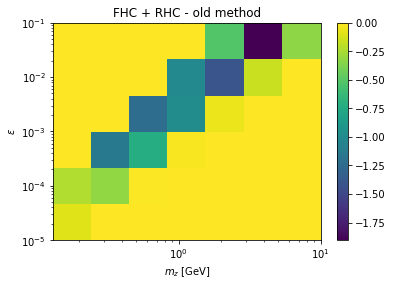

In [17]:
plt.pcolormesh(mz, epsilon, dark_photons_constraints_integral[1][0])
plt.colorbar()
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')
plt.title('FHC + RHC - old method')

<ipython-input-20-b70db40d92f2>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(mz, epsilon, dark_photons_constraints_integral[1][0],


Text(0, 0.5, '$\\epsilon$')

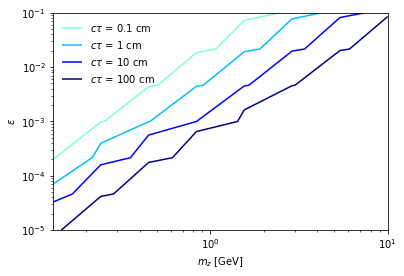

In [20]:
# plot
lifetimes = [0.1, 1, 10, 100]
colors = ['aquamarine', 'deepskyblue', 'blue', 'navy']
contour = plt.contour(mz, epsilon, dark_photons_constraints_integral[1][3], levels=lifetimes, colors=colors)
plt.contour(mz, epsilon, dark_photons_constraints_integral[1][0], 
                                  levels=[levels[0.9]], colors=['chocolate'])
plt.legend(contour.legend_elements()[0], 
           [f'$c \\tau$ = {lifetime} cm' for lifetime in lifetimes],
           frameon=False,
           loc='upper left')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

# plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.png', bbox_inches='tight', dpi=250)
# plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.pdf')

<ipython-input-35-b70db40d92f2>:5: UserWarning: No contour levels were found within the data range.
  plt.contour(mz, epsilon, dark_photons_constraints_integral[1][0],


Text(0, 0.5, '$\\epsilon$')

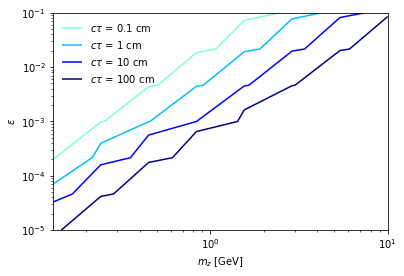

In [35]:
# plot
lifetimes = [0.1, 1, 10, 100]
colors = ['aquamarine', 'deepskyblue', 'blue', 'navy']
contour = plt.contour(mz, epsilon, dark_photons_constraints_integral[1][3], levels=lifetimes, colors=colors)
plt.contour(mz, epsilon, dark_photons_constraints_integral[1][0], 
                                  levels=[levels[0.9]], colors=['chocolate'])
plt.legend(contour.legend_elements()[0], 
           [f'$c \\tau$ = {lifetime} cm' for lifetime in lifetimes],
           frameon=False,
           loc='upper left')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

# plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.png', bbox_inches='tight', dpi=250)
# plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.pdf')

<ipython-input-13-73b32106cf63>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(mz_ticks, epsilon_ticks, mu_full.T)


Text(0.5, 1.0, 'FHC + RHC')

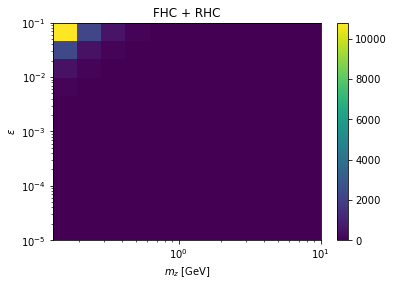

In [13]:
plt.pcolormesh(mz_ticks, epsilon_ticks, mu_full.T)
plt.colorbar()
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')
plt.title('FHC + RHC')

Text(0, 0.5, '$\\epsilon$')

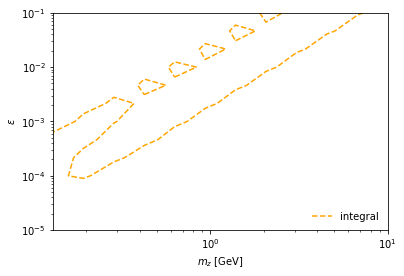

In [14]:
# old-plot
colors = ['blue', 'orange', 'green']
contours = {}
# contours['expo'] = plt.contour(mz_ticks, epsilon_ticks, np.squeeze(out[0]), 
#                                   levels=[levels[0.9]], colors=[colors[0]])
contours['integral'] = plt.contour(mz_ticks, epsilon_ticks, like_full.T, 
                                  levels=[levels[0.9]], colors=[colors[1]])
plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
           contours.keys(),
           frameon=False,
           loc='lower right')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

# plt.savefig(save_folder + 'dark_photon_bounds_comparison_expo_integral.png', bbox_inches='tight', dpi=250)
# plt.savefig(save_folder + 'dark_photon_bounds_comparison_expo_integral.pdf')

## Previous plots

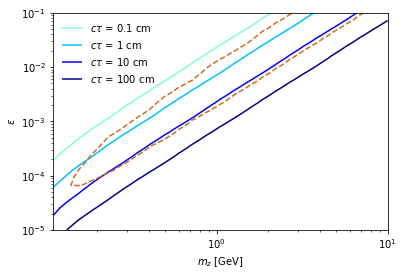

In [41]:
# plot
lifetimes = [0.1, 1, 10, 100]
colors = ['aquamarine', 'deepskyblue', 'blue', 'navy']
contour = plt.contour(mz, epsilon, dark_photons_constraints_expo[1][3], levels=lifetimes, colors=colors)
plt.contour(mz, epsilon, dark_photons_constraints_integral[Ud4_2][0], 
                                  levels=[levels[0.9]], colors=['chocolate'])
plt.legend(contour.legend_elements()[0], 
           [f'$c \\tau$ = {lifetime} cm' for lifetime in lifetimes],
           frameon=False,
           loc='upper left')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.png', bbox_inches='tight', dpi=250)
plt.savefig(save_folder + 'dark_photon_bounds_and_lifetime.pdf')

<ipython-input-31-46beb3c07ad0>:22: RuntimeWarning: invalid value encountered in true_divide
  pcm = axs[1][0].pcolormesh(mz, epsilon, np.sqrt(this_dark_photons_constraints[2])/this_dark_photons_constraints[1],


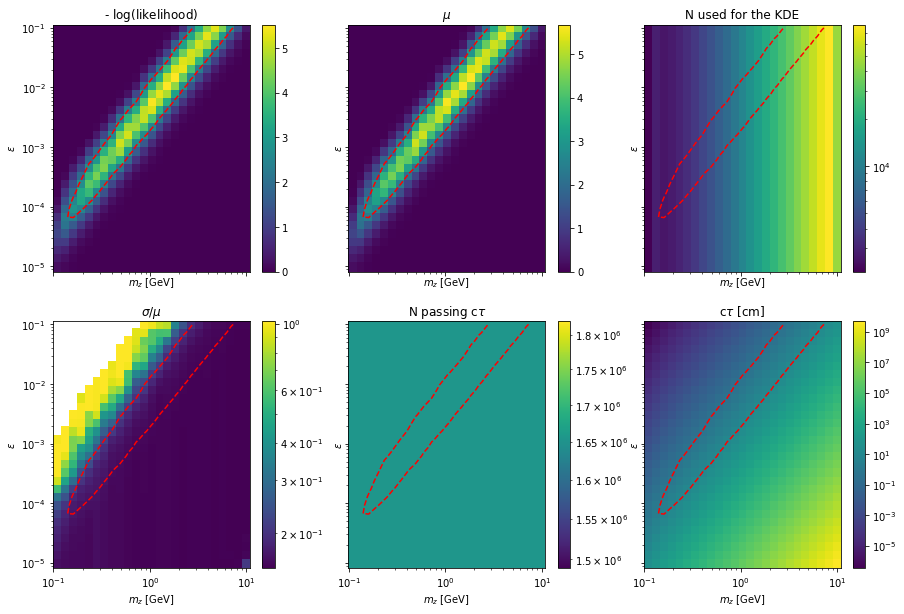

In [31]:
Ud4_2 = 1 
# this_dark_photons_constraints = dark_photons_constraints_expo[Ud4_2]
this_dark_photons_constraints = dark_photons_constraints_integral[Ud4_2]
# this_dark_photons_constraints = dark_photons_constraints_integral_last_layer_lead[Ud4_2]

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
axs[0][0].loglog()

pcm = axs[0][0].pcolormesh(mz, epsilon, -this_dark_photons_constraints[0], shading='auto')
fig.colorbar(pcm, ax=axs[0][0])
axs[0][0].set_title(r'- $\log$(likelihood)')

pcm = axs[0][1].pcolormesh(mz, epsilon, this_dark_photons_constraints[1], shading='auto')
fig.colorbar(pcm, ax=axs[0][1])
axs[0][1].set_title(r'$\mu$')

pcm = axs[0][2].pcolormesh(mz, epsilon, this_dark_photons_constraints[5], norm=LogNorm(), shading='auto')
fig.colorbar(pcm, ax=axs[0][2])
axs[0][2].set_title(r'N used for the KDE')


pcm = axs[1][0].pcolormesh(mz, epsilon, np.sqrt(this_dark_photons_constraints[2])/this_dark_photons_constraints[1], 
                           norm=LogNorm(), shading='auto')
fig.colorbar(pcm, ax=axs[1][0])
axs[1][0].set_title(r'$\sigma / \mu$')

pcm = axs[1][1].pcolormesh(mz, epsilon, this_dark_photons_constraints[4], norm=LogNorm(), shading='auto')
fig.colorbar(pcm, ax=axs[1][1])
axs[1][1].set_title(r'N passing c$\tau$')

pcm = axs[1][2].pcolormesh(mz, epsilon, this_dark_photons_constraints[3], norm=LogNorm(), shading='auto')
fig.colorbar(pcm, ax=axs[1][2])
axs[1][2].set_title(r'c$\tau$ [cm]')

for axes in axs:
    for ax in axes:
        ax.set_xlabel(r'$m_z$ [GeV]')
        ax.set_ylabel(r'$\epsilon$')
        ax.contour(mz, epsilon, this_dark_photons_constraints[0], levels=[levels[0.9]], colors=['red'])
        
fig.savefig(save_folder + 'dark_photon_space_study_integral_precision.png', bbox_inches='tight', dpi=250)
fig.savefig(save_folder + 'dark_photon_space_study_integral_precision.pdf')

<ipython-input-30-d9ce72da17f9>:31: UserWarning: No contour levels were found within the data range.
  ax.contour(mz, epsilon, this_dark_photons_constraints[0], levels=[levels[0.9]], colors=['red'])


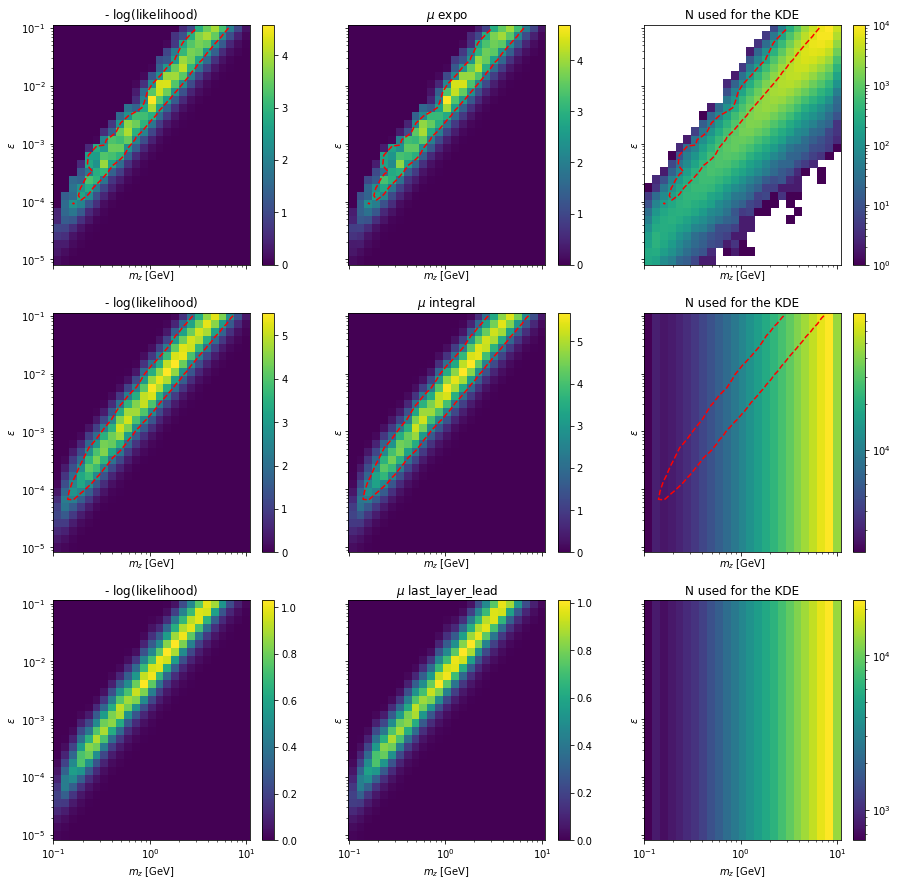

In [30]:
Ud4_2 = 1 
# this_dark_photons_constraints = dark_photons_constraints_expo[Ud4_2]
# this_dark_photons_constraints = dark_photons_constraints_integral[Ud4_2]
# this_dark_photons_constraints = dark_photons_constraints_integral_last_layer_lead[Ud4_2]

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)

for i, (this_dark_photons_constraints, label) in enumerate(zip([dark_photons_constraints_expo, 
                                                  dark_photons_constraints_integral, 
                                                  dark_photons_constraints_integral_last_layer_lead],
                                                      ['expo', 'integral', 'last_layer_lead'])):
    
    this_dark_photons_constraints = this_dark_photons_constraints[Ud4_2]

    pcm = axs[i][0].pcolormesh(mz, epsilon, -this_dark_photons_constraints[0], shading='nearest')
    fig.colorbar(pcm, ax=axs[i][0])
    axs[i][0].set_title(r'- $\log$(likelihood)')

    pcm = axs[i][1].pcolormesh(mz, epsilon, this_dark_photons_constraints[1], shading='nearest')
    fig.colorbar(pcm, ax=axs[i][1])
    axs[i][1].set_title(r'$\mu$ ' + label)

    pcm = axs[i][2].pcolormesh(mz, epsilon, this_dark_photons_constraints[5], norm=LogNorm(), shading='nearest')
    fig.colorbar(pcm, ax=axs[i][2])
    axs[i][2].set_title(r'N used for the KDE')

    for ax in axs[i]:
        ax.loglog()
        ax.set_xlabel(r'$m_z$ [GeV]')
        ax.set_ylabel(r'$\epsilon$')
        ax.contour(mz, epsilon, this_dark_photons_constraints[0], levels=[levels[0.9]], colors=['red'])
        
fig.savefig(save_folder + 'dark_photon_space_study_methods_comparison.png', bbox_inches='tight', dpi=250)
fig.savefig(save_folder + 'dark_photon_space_study_methods_comparison.pdf')

<ipython-input-29-7f5a9efd640b>:13: RuntimeWarning: divide by zero encountered in true_divide
  this_dark_photons_constraints_lll[0]/this_dark_photons_constraints_normal[0],
<ipython-input-29-7f5a9efd640b>:13: RuntimeWarning: invalid value encountered in true_divide
  this_dark_photons_constraints_lll[0]/this_dark_photons_constraints_normal[0],
<ipython-input-29-7f5a9efd640b>:21: RuntimeWarning: divide by zero encountered in true_divide
  this_dark_photons_constraints_lll[1]/this_dark_photons_constraints_normal[1],
<ipython-input-29-7f5a9efd640b>:21: RuntimeWarning: invalid value encountered in true_divide
  this_dark_photons_constraints_lll[1]/this_dark_photons_constraints_normal[1],
<ipython-input-29-7f5a9efd640b>:69: UserWarning: No contour levels were found within the data range.
  ax.contour(mz, epsilon, this_dark_photons_constraints_lll[0], levels=[levels[0.9]], colors=['blue'])


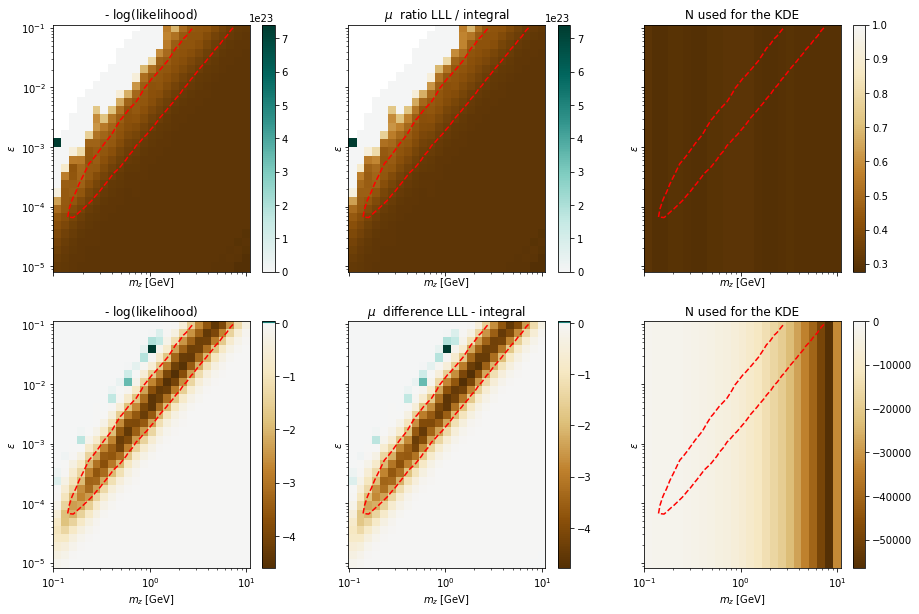

In [29]:
from matplotlib import colors

Ud4_2 = 1 
this_dark_photons_constraints_normal = dark_photons_constraints_integral[Ud4_2]
this_dark_photons_constraints_lll = dark_photons_constraints_integral_last_layer_lead[Ud4_2]

this_cmap = 'BrBG'

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

i = 0
pcm = axs[i][0].pcolormesh(mz, epsilon, 
                           this_dark_photons_constraints_lll[0]/this_dark_photons_constraints_normal[0], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=1))
fig.colorbar(pcm, ax=axs[i][0])
axs[i][0].set_title(r'- $\log$(likelihood)')

pcm = axs[i][1].pcolormesh(mz, epsilon, 
                           this_dark_photons_constraints_lll[1]/this_dark_photons_constraints_normal[1], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=1))
fig.colorbar(pcm, ax=axs[i][1])
axs[i][1].set_title(r'$\mu$ ' + ' ratio LLL / integral')

pcm = axs[i][2].pcolormesh(mz, epsilon, 
                           this_dark_photons_constraints_lll[5]/this_dark_photons_constraints_normal[5], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=1))
fig.colorbar(pcm, ax=axs[i][2])
axs[i][2].set_title(r'N used for the KDE')


i = 1
pcm = axs[i][0].pcolormesh(mz, epsilon, 
                           -this_dark_photons_constraints_lll[0] + this_dark_photons_constraints_normal[0], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=0))
fig.colorbar(pcm, ax=axs[i][0])
axs[i][0].set_title(r'- $\log$(likelihood)')

pcm = axs[i][1].pcolormesh(mz, epsilon, 
                           this_dark_photons_constraints_lll[1] - this_dark_photons_constraints_normal[1], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=0))
fig.colorbar(pcm, ax=axs[i][1])
axs[i][1].set_title(r'$\mu$ ' + ' difference LLL - integral')

pcm = axs[i][2].pcolormesh(mz, epsilon, 
                           this_dark_photons_constraints_lll[5] - this_dark_photons_constraints_normal[5], 
                           shading='auto',
                           cmap=this_cmap,
                           norm=colors.TwoSlopeNorm(vcenter=0))
fig.colorbar(pcm, ax=axs[i][2])
axs[i][2].set_title(r'N used for the KDE')

for axes in axs:
    for ax in axes:
        ax.loglog()
        ax.set_xlabel(r'$m_z$ [GeV]')
        ax.set_ylabel(r'$\epsilon$')
        # ax.contour(mz, epsilon, this_dark_photons_constraints[0], levels=[levels[0.9]], colors=['red'])
        ax.contour(mz, epsilon, this_dark_photons_constraints_normal[0], levels=[levels[0.9]], colors=['red'])
        ax.contour(mz, epsilon, this_dark_photons_constraints_lll[0], levels=[levels[0.9]], colors=['blue'])
        
# fig.savefig(save_folder + 'dark_photon_space_study_methods_comparison.png', bbox_inches='tight', dpi=250)
# fig.savefig(save_folder + 'dark_photon_space_study_methods_comparison.pdf')